# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


In [2]:
df = pd.read_csv("Instagram-Data.csv")

In [3]:
df.head()

Country  Rank        Account              Title  \
0     All     1      cristiano  Cristiano Ronaldo   
1     All     2    kyliejenner            Kylie 🤍   
2     All     3       leomessi          Leo Messi   
3     All     4  kendalljenner            Kendall   
4     All     5    selenagomez       Selena Gomez   

                                       Link                   Category  \
0      https://www.instagram.com/cristiano/         Sports with a ball   
1    https://www.instagram.com/kyliejenner/    Fashion|Modeling|Beauty   
2       https://www.instagram.com/leomessi/  Sports with a ball|Family   
3  https://www.instagram.com/kendalljenner/           Modeling|Fashion   
4    https://www.instagram.com/selenagomez/            Music|Lifestyle   

   Followers Audience Country  Authentic engagement  Engagement avg  Scraped  
0  400100000            India               7800000         9500000  50:24.8  
1  308800000    United States               6200000        10100000  50:24.8  
2  306300000        Argentina               4800000         6500000  50:24.8  
3  217800000    United States               3400000         5400000  50:24.8  
4  295800000    United States               2700000         3600000  50:24.8

In [4]:
df.tail()

Country  Rank        Account                           Title  \
995     All   996  senoritasaeva                      Dina Saeva   
996     All   997    manuelneuer                    Manuel Neuer   
997     All   998      sahilkhan  India’s Youth & Fitness IC⭕️N®   
998     All   999    mohanshakti                    Shakti Mohan   
999     All  1000       eduincaz                       Eduin Caz   

                                         Link  \
995  https://www.instagram.com/senoritasaeva/   
996    https://www.instagram.com/manuelneuer/   
997      https://www.instagram.com/sahilkhan/   
998    https://www.instagram.com/mohanshakti/   
999       https://www.instagram.com/eduincaz/   

                                Category  Followers Audience Country  \
995             Lifestyle|Music|Modeling    7700000           Russia   
996                   Sports with a ball   11500000          Germany   
997                          Fitness|Gym   10100000            India   
998  Art|Artists|Cinema|Actors/actresses   13700000            India   
999                            Lifestyle    6200000           Mexico   

     Authentic engagement  Engagement avg  Scraped  
995                246600          318200  50:24.8  
996                146500          210200  50:24.8  
997                176500          239800  50:24.8  
998                146400          175500  50:24.8  
999                305600          391900  50:24.8

In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Account               1000 non-null   object
 3   Title                 983 non-null    object
 4   Link                  1000 non-null   object
 5   Category              909 non-null    object
 6   Followers             1000 non-null   int64 
 7   Audience Country      993 non-null    object
 8   Authentic engagement  1000 non-null   int64 
 9   Engagement avg        1000 non-null   int64 
 10  Scraped               1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [7]:
df.describe().T

count        mean           std        min         25%  \
Rank                  1000.0       500.5  2.888194e+02        1.0      250.75   
Followers             1000.0  24836100.0  3.872143e+07  2800000.0  9000000.00   
Authentic engagement  1000.0    649122.8  1.098804e+06        0.0   209100.00   
Engagement avg        1000.0    865388.6  1.267515e+06    52000.0   308600.00   

                             50%          75%          max  
Rank                       500.5       750.25       1000.0  
Followers             14400000.0  25650000.00  469600000.0  
Authentic engagement    363700.0    683250.00   13400000.0  
Engagement avg          523900.0    950800.00   13400000.0

In [8]:
df.isnull().sum()

Country                  0
Rank                     0
Account                  0
Title                   17
Link                     0
Category                91
Followers                0
Audience Country         7
Authentic engagement     0
Engagement avg           0
Scraped                  0
dtype: int64

<Axes: >

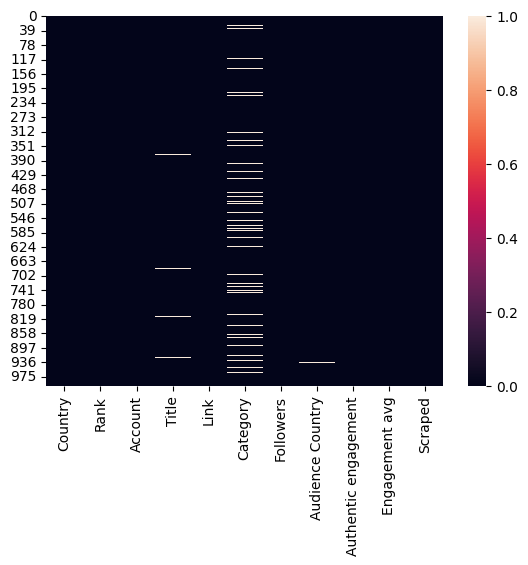

In [9]:
sns.heatmap(df.isna())

In [10]:
df.duplicated().sum()

0

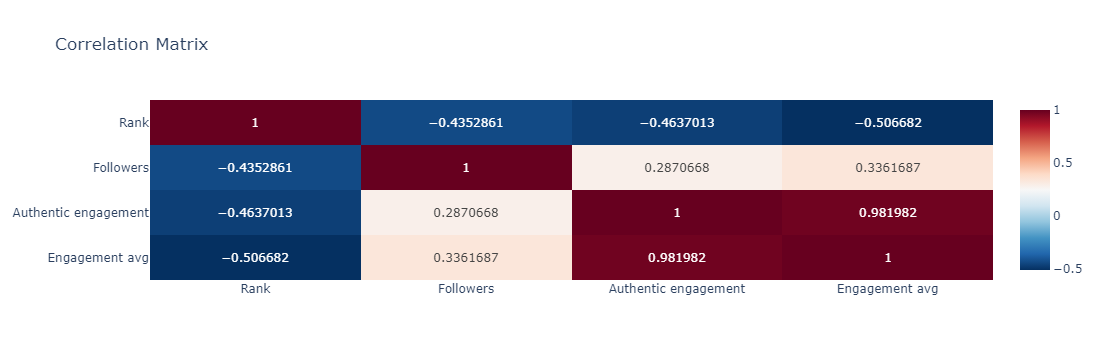

In [11]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

<Axes: >

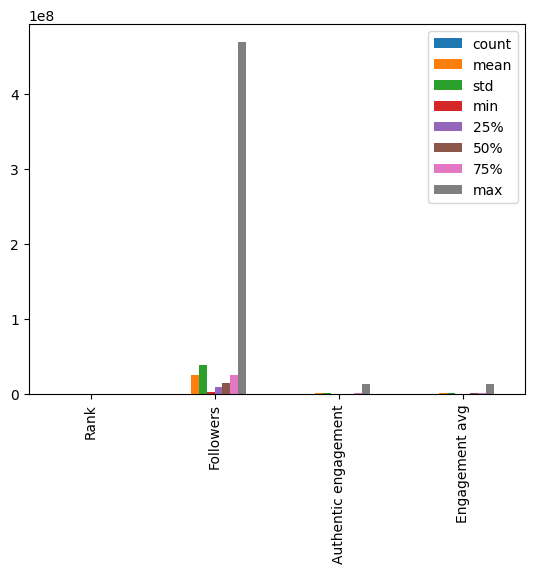

In [12]:
df.describe().T.plot(kind='bar')

In [13]:
df.columns.tolist()

['Country',
 'Rank',
 'Account',
 'Title',
 'Link',
 'Category',
 'Followers',
 'Audience Country',
 'Authentic engagement',
 'Engagement avg',
 'Scraped']

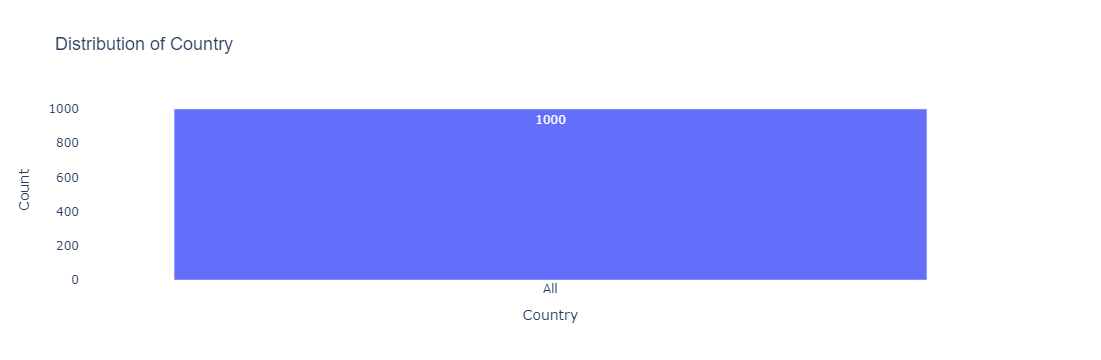

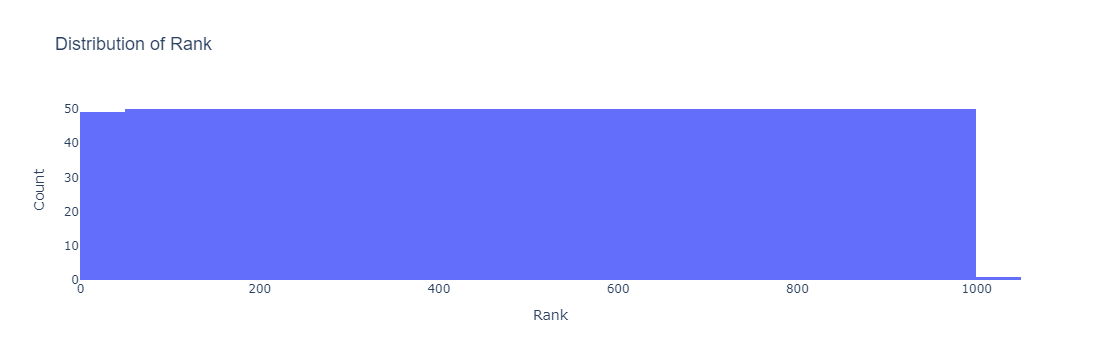

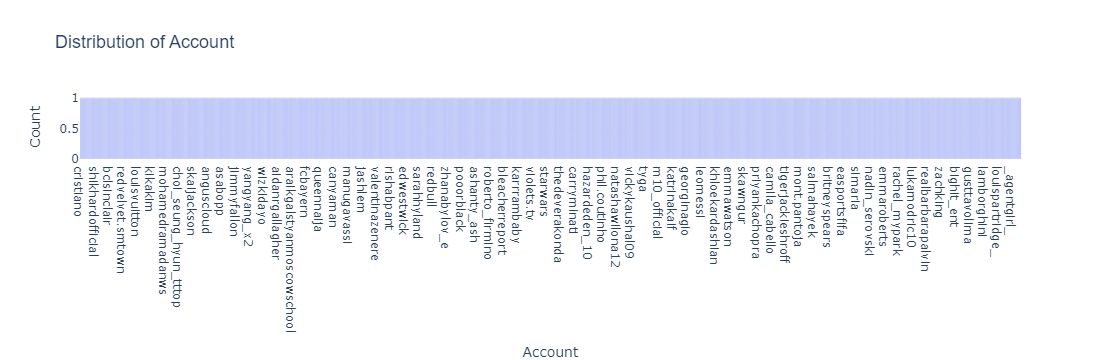

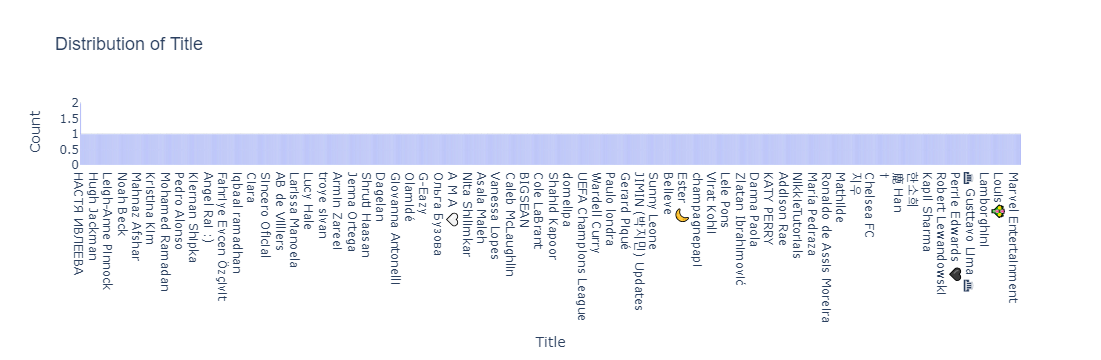

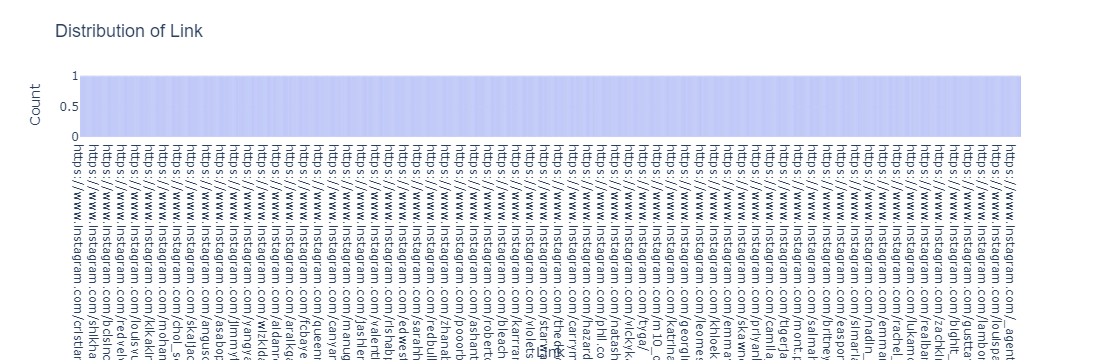

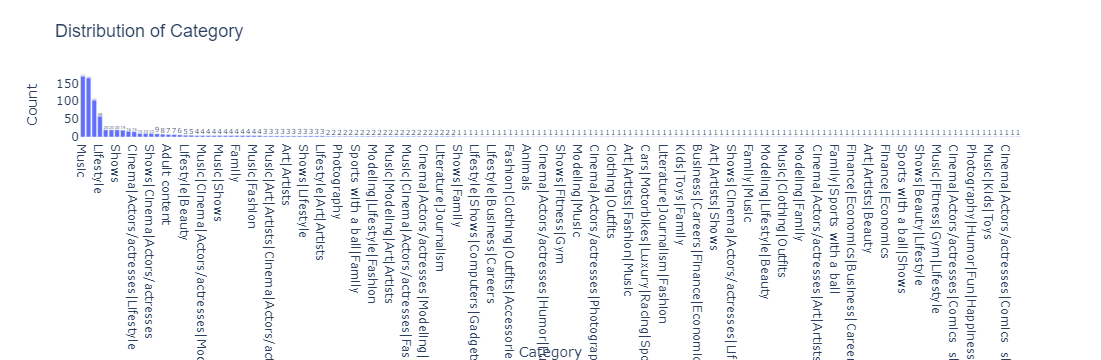

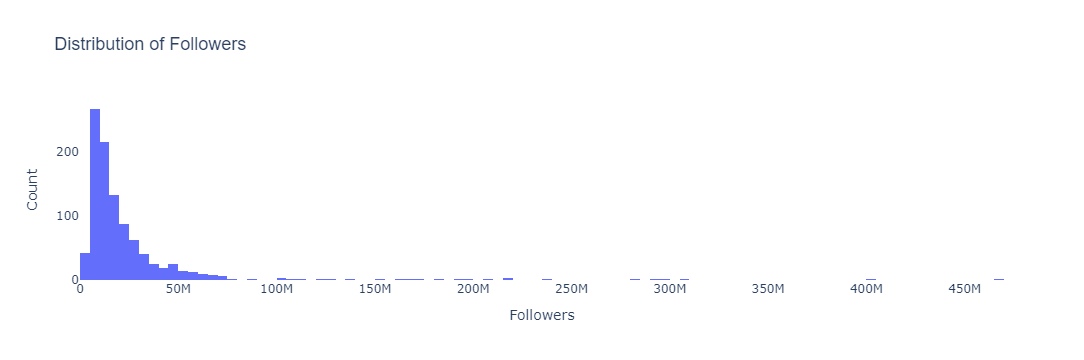

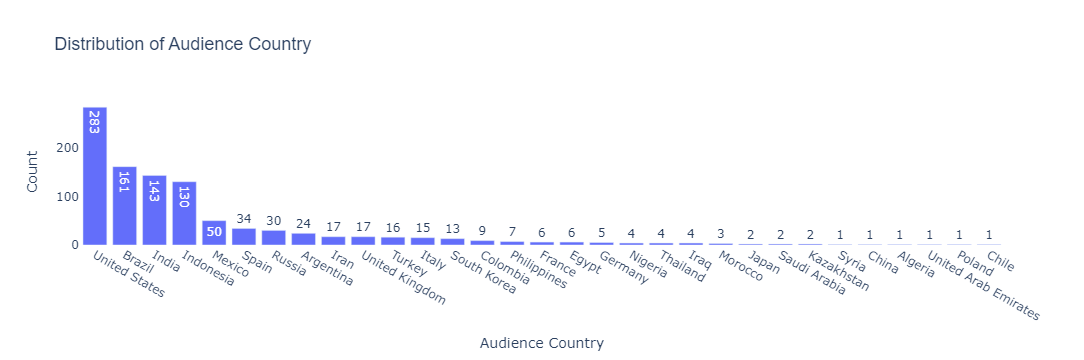

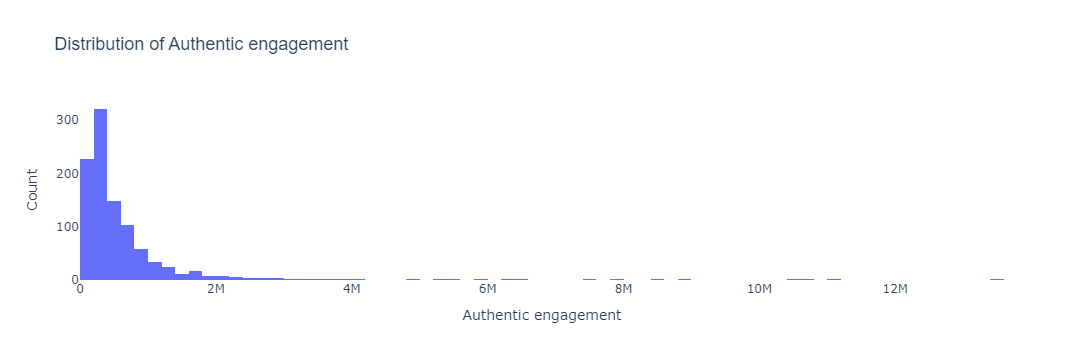

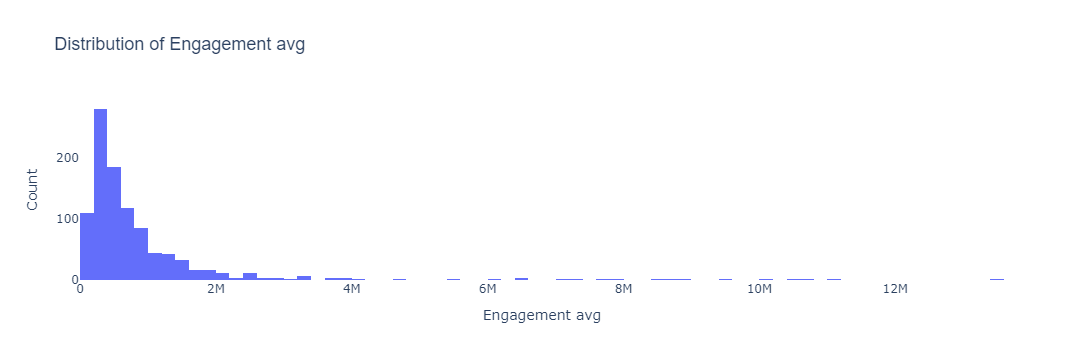

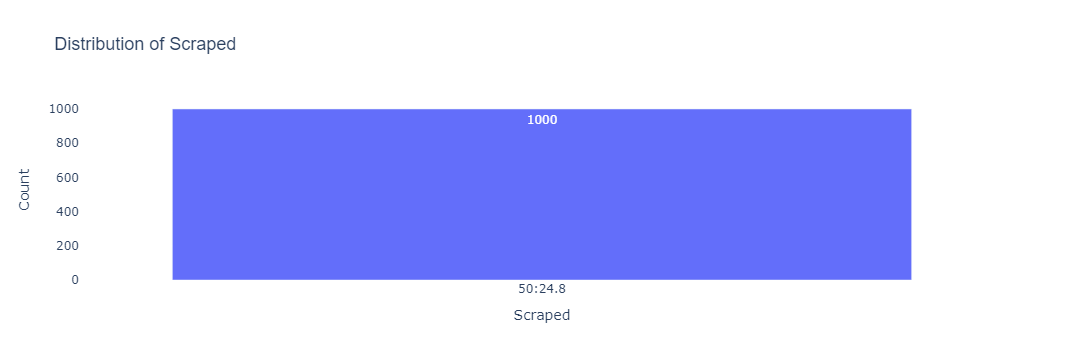

In [14]:
columns = ['Country',
 'Rank',
 'Account',
 'Title',
 'Link',
 'Category',
 'Followers',
 'Audience Country',
 'Authentic engagement',
 'Engagement avg',
 'Scraped']

for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [15]:
df

Country  Rank        Account                           Title  \
0       All     1      cristiano               Cristiano Ronaldo   
1       All     2    kyliejenner                         Kylie 🤍   
2       All     3       leomessi                       Leo Messi   
3       All     4  kendalljenner                         Kendall   
4       All     5    selenagomez                    Selena Gomez   
..      ...   ...            ...                             ...   
995     All   996  senoritasaeva                      Dina Saeva   
996     All   997    manuelneuer                    Manuel Neuer   
997     All   998      sahilkhan  India’s Youth & Fitness IC⭕️N®   
998     All   999    mohanshakti                    Shakti Mohan   
999     All  1000       eduincaz                       Eduin Caz   

                                         Link  \
0        https://www.instagram.com/cristiano/   
1      https://www.instagram.com/kyliejenner/   
2         https://www.instagram.com/leomessi/   
3    https://www.instagram.com/kendalljenner/   
4      https://www.instagram.com/selenagomez/   
..                                        ...   
995  https://www.instagram.com/senoritasaeva/   
996    https://www.instagram.com/manuelneuer/   
997      https://www.instagram.com/sahilkhan/   
998    https://www.instagram.com/mohanshakti/   
999       https://www.instagram.com/eduincaz/   

                                Category  Followers Audience Country  \
0                     Sports with a ball  400100000            India   
1                Fashion|Modeling|Beauty  308800000    United States   
2              Sports with a ball|Family  306300000        Argentina   
3                       Modeling|Fashion  217800000    United States   
4                        Music|Lifestyle  295800000    United States   
..                                   ...        ...              ...   
995             Lifestyle|Music|Modeling    7700000           Russia   
996                   Sports with a ball   11500000          Germany   
997                          Fitness|Gym   10100000            India   
998  Art|Artists|Cinema|Actors/actresses   13700000            India   
999                            Lifestyle    6200000           Mexico   

     Authentic engagement  Engagement avg  Scraped  
0                 7800000         9500000  50:24.8  
1                 6200000        10100000  50:24.8  
2                 4800000         6500000  50:24.8  
3                 3400000         5400000  50:24.8  
4                 2700000         3600000  50:24.8  
..                    ...             ...      ...  
995                246600          318200  50:24.8  
996                146500          210200  50:24.8  
997                176500          239800  50:24.8  
998                146400          175500  50:24.8  
999                305600          391900  50:24.8  

[1000 rows x 11 columns]

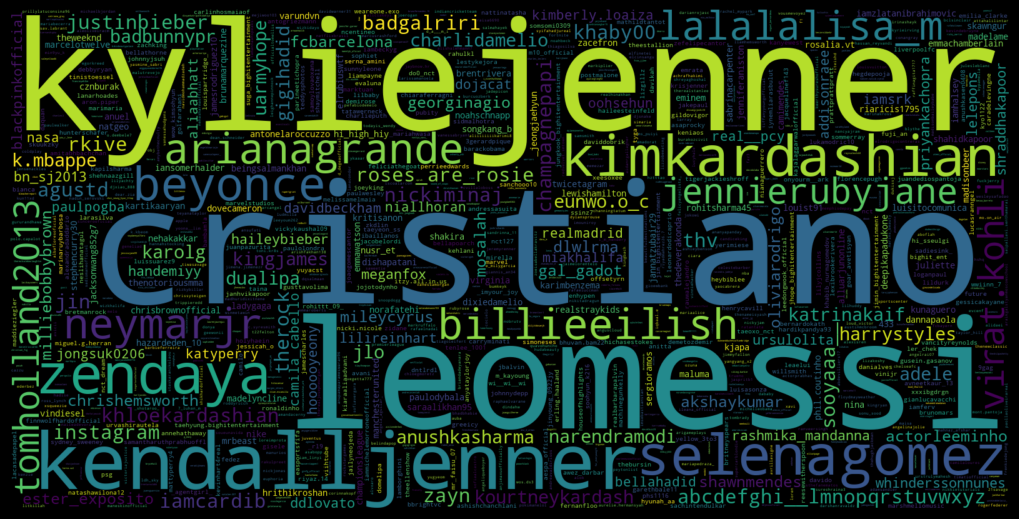

In [16]:
stop_words_list = set(STOPWORDS)

counts = Counter(df["Account"].dropna().apply(lambda x: str(x)))


wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)


plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()